In [2]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.visualization import simple_norm
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy import units as u

from spectral_cube import SpectralCube
from spectral_cube import Projection


from astropy.visualization.wcsaxes import add_scalebar
from astropy.visualization.wcsaxes import add_beam

import importlib as imp

In [3]:
pos_smudge = SkyCoord('17:46:23.6171497910', '-28:36:43.0690114397', unit=(u.hourangle, u.deg), frame='icrs')

In [4]:
cd ..

/blue/adamginsburg/adamginsburg/jwst/cloudc/code/lactea-filament/lactea-filament


In [5]:
import cutout_manager as cm

In [6]:
plt.style.use('dark_background')

In [14]:
imp.reload(cm)

<module 'cutout_manager' from '/blue/adamginsburg/adamginsburg/jwst/cloudc/code/lactea-filament/lactea-filament/cutout_manager.py'>

In [7]:
def get_percentile_list(data, percents=[98, 99, 99.5, 99.9]):
    return [np.nanpercentile(data, p) for p in percents]

# Smudge Images

In [8]:
l = w = 5*u.arcsec

In [10]:
rgb_data, rgb_wcs = cm.get_cutout_rgb(pos_smudge, l, w)

In [15]:
rgb3_data, rgb3_wcs = cm.get_cutout_rgb3(pos_smudge, l, w)

In [18]:
cutout_B3 = cm.get_alma_B3(pos_smudge, l, w)

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


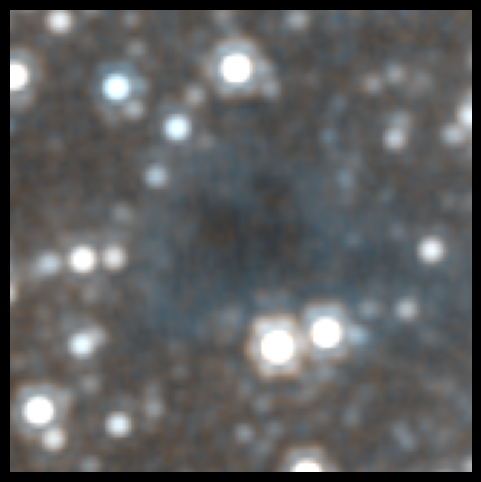

In [11]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection=rgb_wcs)
ax.imshow(rgb_data)

ax.set_axis_off()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


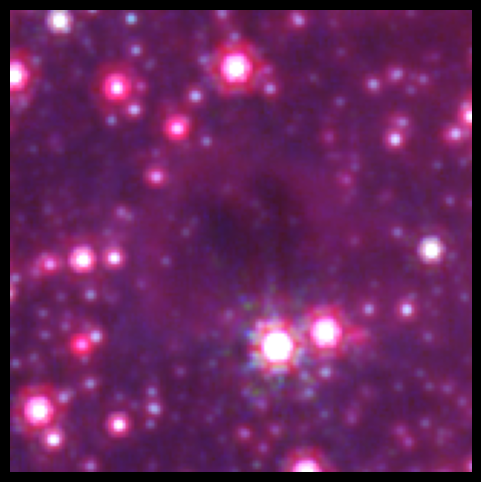

In [16]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection=rgb3_wcs)
ax.imshow(rgb3_data)

ax.set_axis_off()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


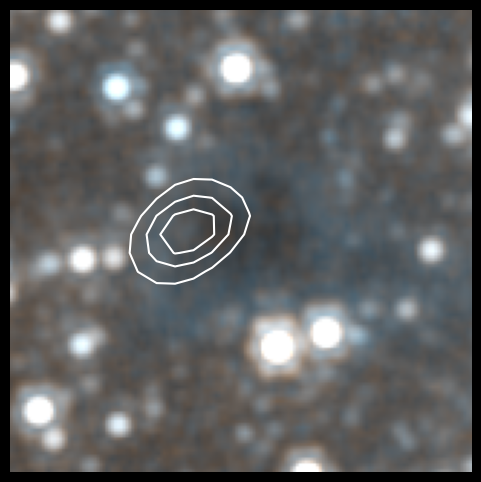

In [24]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection=rgb_wcs)
ax.imshow(rgb_data)
ax.contour(cutout_B3.data, levels=get_percentile_list(cutout_B3.data, percents=[96, 98, 99]), colors='white', transform=ax.get_transform(cutout_B3.wcs))

ax.set_axis_off()

In [25]:
cutout_405 = cm.get_cutout_405(pos_smudge, l, w)
cutout_410 = cm.get_cutout_410(pos_smudge, l, w)
cutout_466 = cm.get_cutout_466(pos_smudge, l, w)
cutout_187 = cm.get_cutout_187(pos_smudge, l, w)
cutout_182 = cm.get_cutout_182(pos_smudge, l, w)
cutout_212 = cm.get_cutout_212(pos_smudge, l, w)

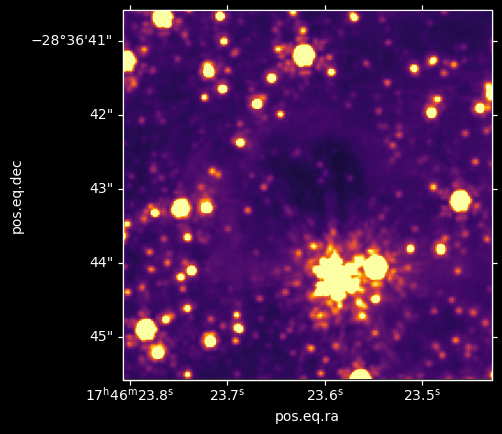

In [38]:
ax = plt.subplot(projection=cutout_182.wcs)
ax.imshow(cutout_182.data, cmap='inferno', vmin=0, vmax=30)

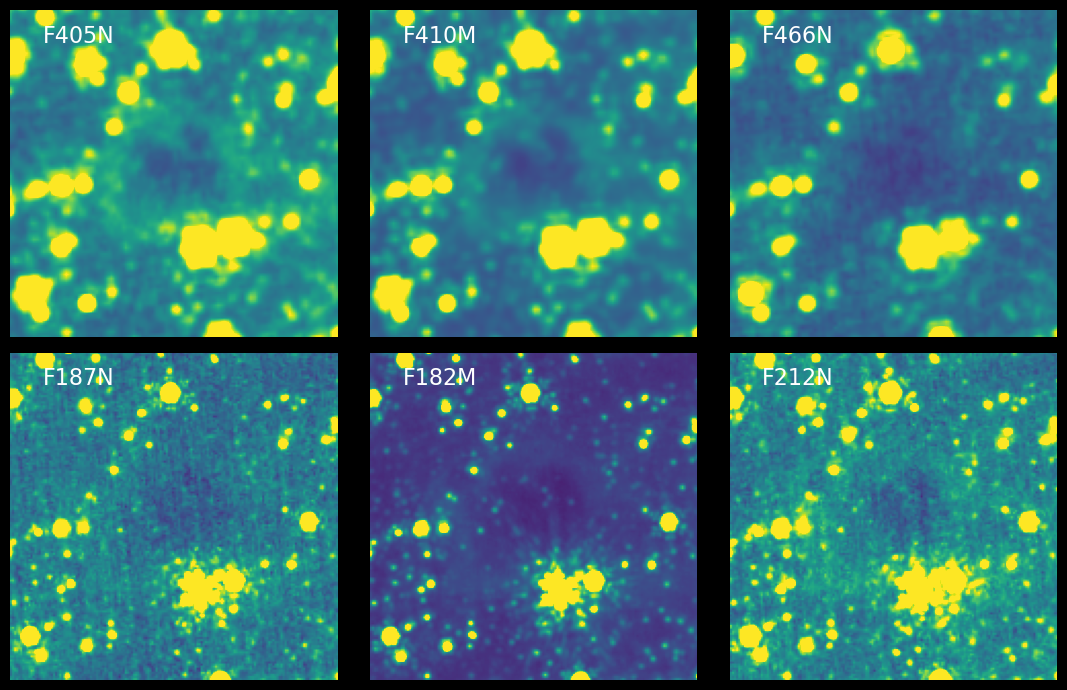

In [40]:
fig = plt.figure(figsize=(11, 7))

cmap = 'viridis'
vmax=30

ax1 = plt.subplot(231, projection=cutout_405.wcs)
ax1.imshow(cutout_405.data, cmap=cmap, vmin=0, vmax=vmax)
ax1.text(0.1, 0.9, 'F405N', color='white', transform=ax1.transAxes, fontsize=16)
ax1.set_axis_off()

ax2 = plt.subplot(232, projection=cutout_410.wcs)
ax2.imshow(cutout_410.data, cmap=cmap, vmin=0, vmax=vmax)
ax2.text(0.1, 0.9, 'F410M', color='white', transform=ax2.transAxes, fontsize=16)
ax2.set_axis_off()

ax3 = plt.subplot(233, projection=cutout_466.wcs)
ax3.imshow(cutout_466.data, cmap=cmap, vmin=0, vmax=vmax)
ax3.text(0.1, 0.9, 'F466N', color='white', transform=ax3.transAxes, fontsize=16)
ax3.set_axis_off()

ax4 = plt.subplot(234, projection=cutout_187.wcs)
ax4.imshow(cutout_187.data, cmap=cmap, vmin=0, vmax=vmax)
ax4.text(0.1, 0.9, 'F187N', color='white', transform=ax4.transAxes, fontsize=16)
ax4.set_axis_off()

ax5 = plt.subplot(235, projection=cutout_182.wcs)
ax5.imshow(cutout_182.data, cmap=cmap, vmin=0, vmax=vmax)
ax5.text(0.1, 0.9, 'F182M', color='white', transform=ax5.transAxes, fontsize=16)
ax5.set_axis_off()

ax6 = plt.subplot(236, projection=cutout_212.wcs)
ax6.imshow(cutout_212.data, cmap=cmap, vmin=0, vmax=vmax)
ax6.text(0.1, 0.9, 'F212N', color='white', transform=ax6.transAxes, fontsize=16)
ax6.set_axis_off()

plt.tight_layout()
